# Problem Statement
This problem comes from the 5th edition of Moore and McCabe’s Introduction to the Practice of Statistics and can be found on pp. 466-467. The data consists of the emissions of three different pollutants from 46 different engines. A copy of the data we use here is available. The problem examined here is different from that given in the book but is motivated by the discussion in the book.

In the following examples we will look at the carbon monoxide data which is one of the columns of this data set. First we will transform the data so that it is close to being normally distributed. We will then find the confidence interval for the mean and then perform a significance test to evaluate whether or not the data is away from a fixed standard. Finally, we will find the power of the test to detect a fixed difference from that standard. We will assume that a confidence level of 95% is used throughout.
## Transforming the Data

We first begin a basic examination of the data. A copy of the data file can be found at table_7_3.csv.The first step is to read in the file and get a summary of the center and spread of the data. In this instance we will focus only on the carbon monoxide data.

In [3]:
engine <- read.csv(file="table_7_3.csv",sep=",",head=TRUE)
names(engine)
summary(engine)

[1] "en"  "hc"  "co"  "nox"

       en              hc               co              nox       
 Min.   : 1.00   Min.   :0.3400   Min.   : 1.850   Min.   :0.490  
 1st Qu.:12.75   1st Qu.:0.4375   1st Qu.: 4.388   1st Qu.:1.110  
 Median :24.50   Median :0.5100   Median : 5.905   Median :1.315  
 Mean   :24.00   Mean   :0.5502   Mean   : 7.879   Mean   :1.340  
 3rd Qu.:35.25   3rd Qu.:0.6025   3rd Qu.:10.015   3rd Qu.:1.495  
 Max.   :46.00   Max.   :1.1000   Max.   :23.530   Max.   :2.940  

At first glance the carbon monoxide data appears to be skewed. The spread between the third quartile and the max is five times the spread between the min and the first quartile. A boxplot is show in Figure 1. showing that the data appears to be skewed. This is further confirmed in the histogram which is shown in Figure 2. Finally, a normal qq plot is given in Figure 3. The data does not appear to be normal.

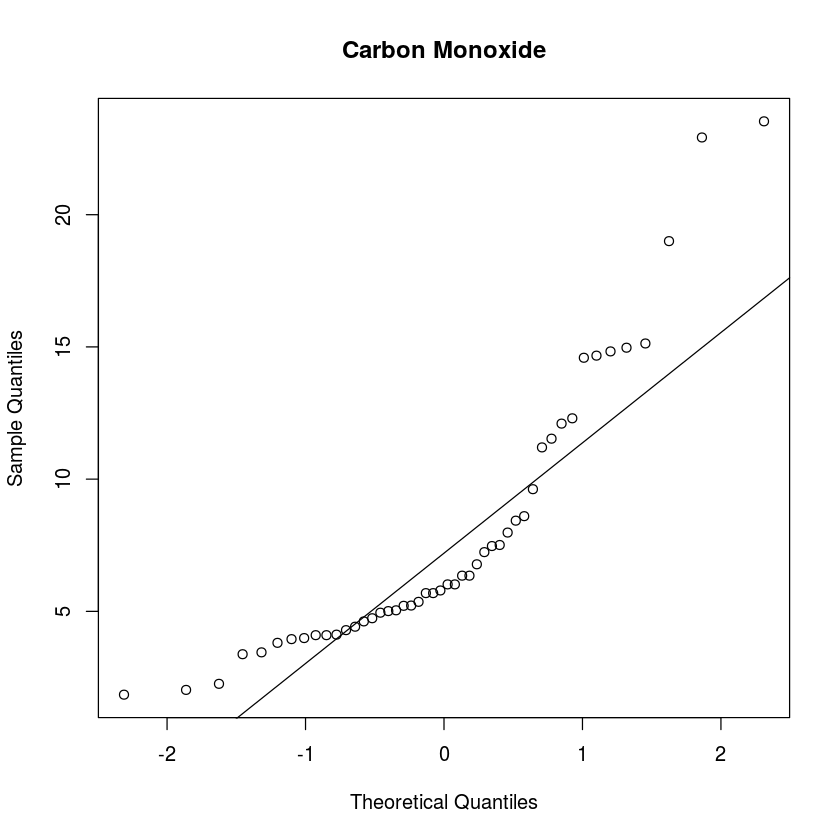

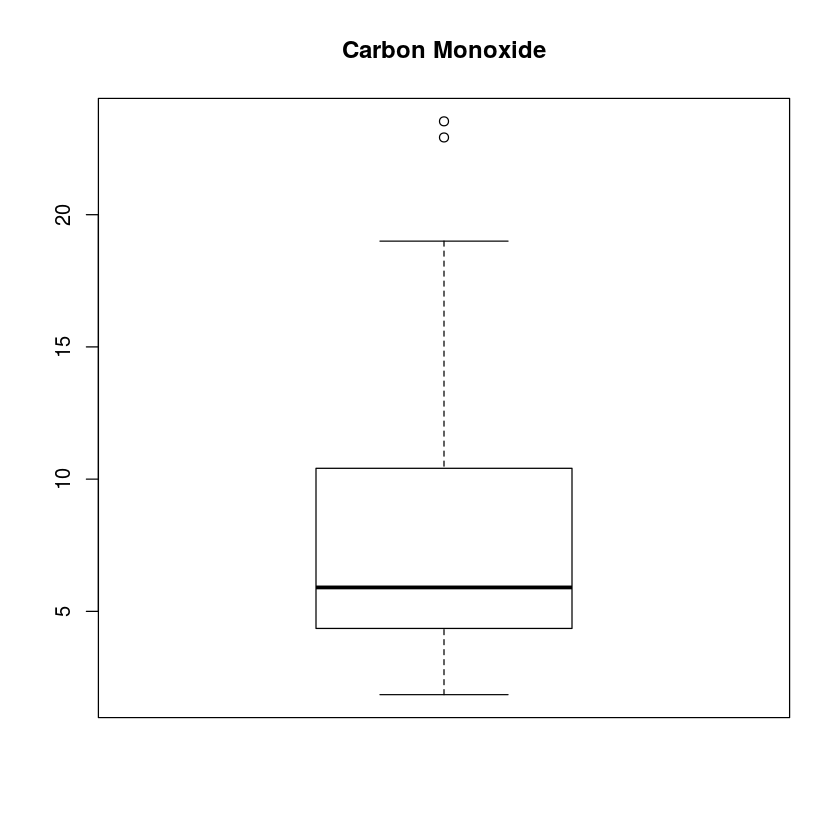

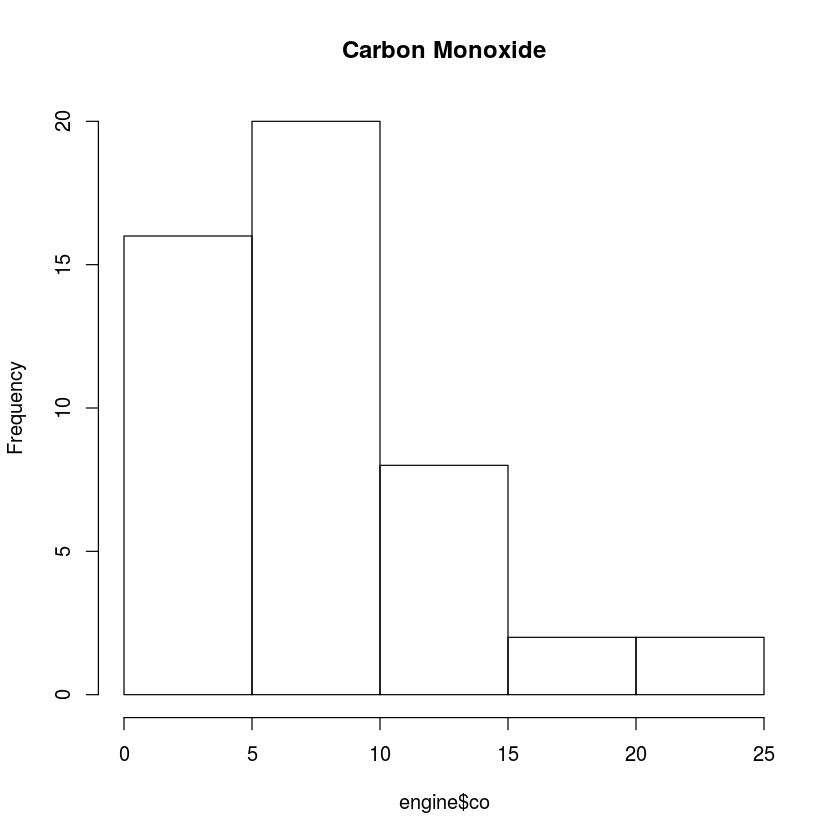

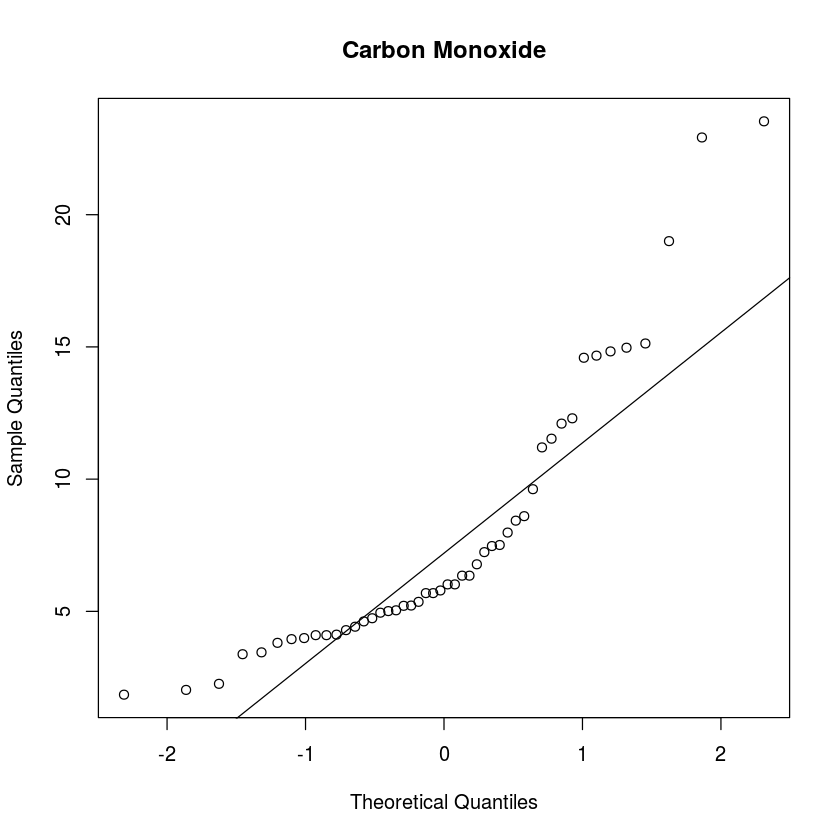

In [6]:
qqnorm(engine$co,main="Carbon Monoxide")
qqline(engine$co)
boxplot(engine$co,main="Carbon Monoxide")
hist(engine$co,main="Carbon Monoxide")
qqnorm(engine$co,main="Carbon Monoxide")
qqline(engine$co)

We next see if the data can be transformed to something that is closer to being normally distributed. We examine the logarithm of the data. First, the boxplot of the log of the data appears to be more evenly distributed as shown in Figure 4. Also, the histogram appears to be centered and closer to normal in Figure 5. Finally, the normal qq plot is shown in in Figure 6. It shows that the data is more consistent with what we would expect from normal data.

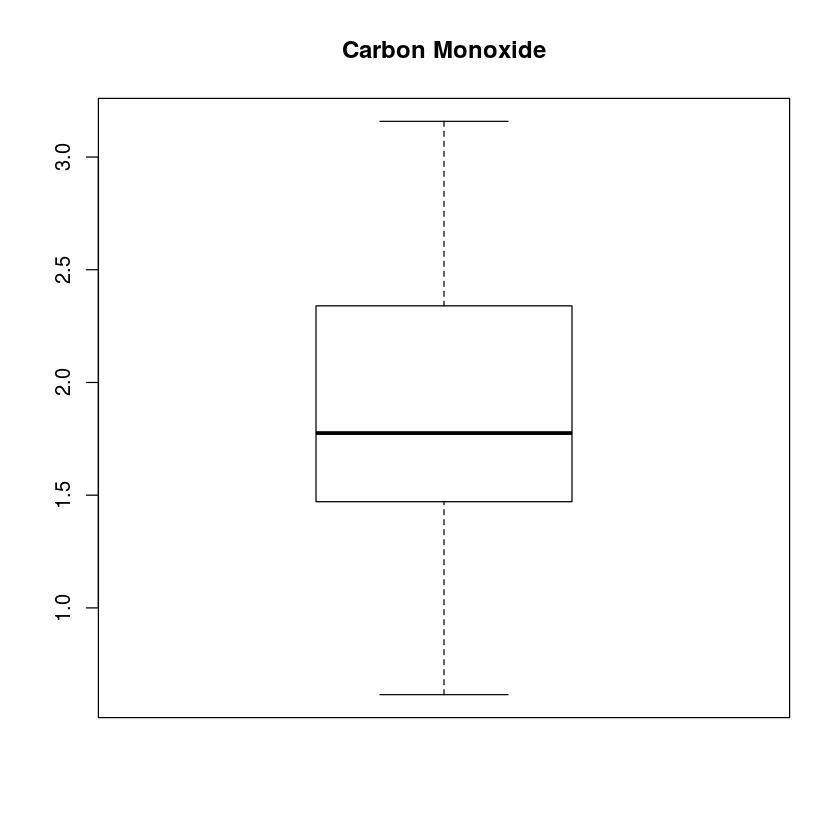

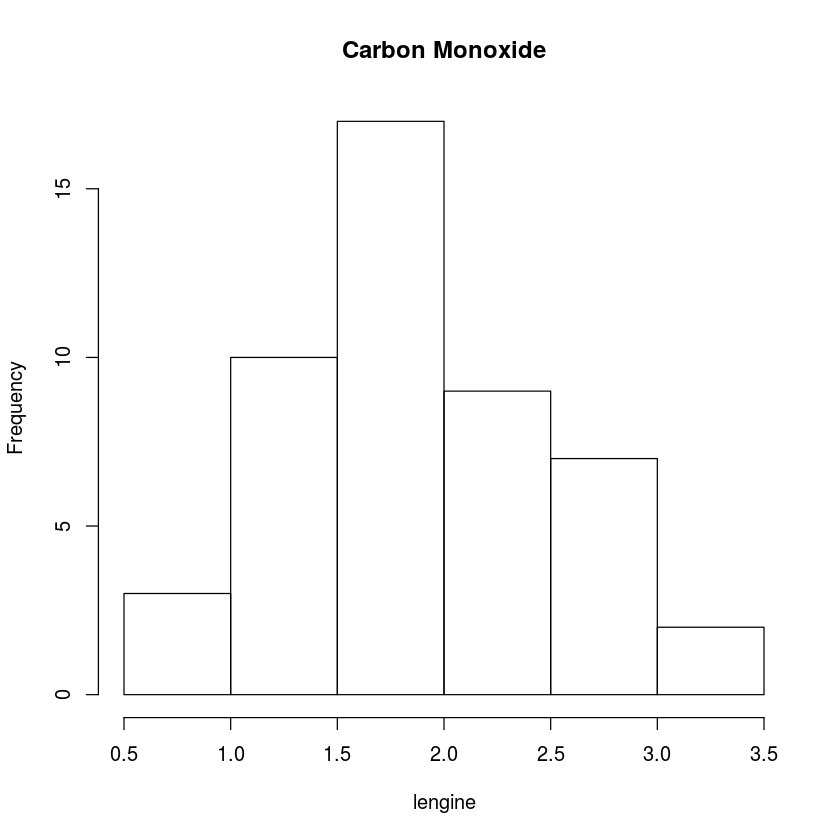

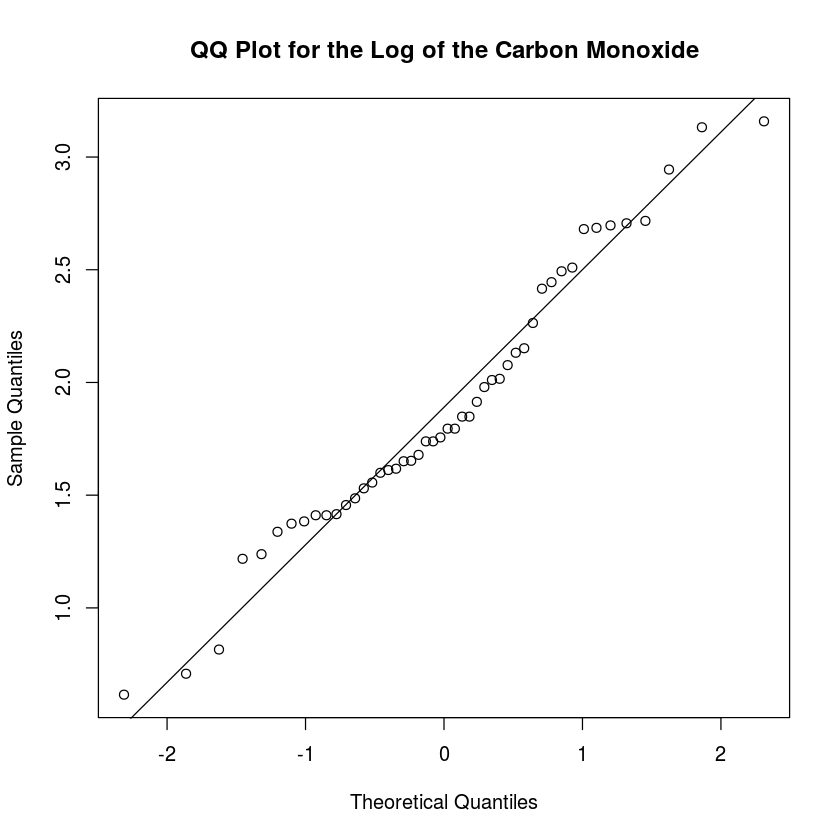

In [7]:
lengine <- log(engine$co)
boxplot(lengine,main="Carbon Monoxide")
hist(lengine,main="Carbon Monoxide")
qqnorm(lengine,main="QQ Plot for the Log of the Carbon Monoxide")
qqline(lengine)


There is strong evidence that the logarithm of the carbon monoxide data more closely resembles a normal distribution then does the raw carbon monoxide data. For that reason all of the analysis that follows will be for the logarithm of the data and will make use of the new list “lengine.”


## The Confidence Interval

We now find the confidence interval for the carbon monoxide data. As stated above, we will work with the logarithm of the data because it appears to be closer to a normal distribution. This data is stored in the list called “lengine.” Since we do not know the true standard deviation we will use the sample standard deviation and will use a t-distribution.

We first find the sample mean, the sample standard deviation, and the number of observations:

In [8]:
m <- mean(lengine)
s <- sd(lengine)
n <- length(lengine)
m
s
n

[1] 1.883678

[1] 0.5983851

[1] 48

Now we find the standard error:

In [9]:
se <- s/sqrt(n)
se

[1] 0.08636945

Finally, the margin of error is found based on a 95% confidence level which can then be used to define the confidence interval:

In [10]:
error <- se*qt(0.975,df=n-1)
error
left <- m-error
right <- m + error
left
right

[1] 0.1737529

[1] 1.709925

[1] 2.057431

The 95% confidence interval is between 1.71 and 2.06. Keep in mind that this is for the logarithm so the 95% confidence interval for the original data can be found by “undoing” the logarithm:

In [11]:
exp(left)
exp(right)

[1] 5.528548

[1] 7.82584

So the 95% confidence interval for the carbon monoxide is between 5.53 and 7.83.

## Test of Significance

We now perform a test of significance. Here we suppose that ideally the engines should have a mean level of 5.4 and do a two-sided hypothesis test. Here we assume that the true mean is labeled μx

and state the hypothesis test:

Ho:μx=5.4,

Ha:μx≠5.4,

To perform the hypothesis test we first assume that the null hypothesis is true and find the confidence interval around the assumed mean. Fortunately, we can use the values from the previous step:

In [12]:
lNull <- log(5.4) - error
rNull <- log(5.4) + error
lNull
rNull
m

[1] 1.512646

[1] 1.860152

[1] 1.883678

The sample mean lies outside of the assumed confidence interval so we can reject the null hypothesis. There is a low probability that we would have obtained our sample mean if the true mean really were 5.4.

Another way to approach the problem would be to calculate the actual p-value for the sample mean that was found. Since the sample mean is greater than 5.4 it can be found with the following code:

In [13]:
2*(1-pt((m-log(5.4))/se,df=n-1))

[1] 0.02692539

Since the p-value is 2.7% which is less than 5% we can reject the null hypothesis.

Note that there is yet another way to do this. The function t.test will do a lot of this work for us.

In [14]:
t.test(lengine,mu = log(5.4),alternative = "two.sided")


	One Sample t-test

data:  lengine
t = 2.2841, df = 47, p-value = 0.02693
alternative hypothesis: true mean is not equal to 1.686399
95 percent confidence interval:
 1.709925 2.057431
sample estimates:
mean of x 
 1.883678 


More information and a more complete list of the options for this command can be found using the help command:

In [15]:
help(t.test)

## The Power of the test

We now find the power of the test. To find the power we need to set a level for the mean and then find the probability that we would accept the null hypothesis if the mean is really at the prescribed level. Here we will find the power to detect a difference if the level were 7. Three different methods are examined. The first is a method that some books advise to use if you do not have a non-central t-test available. The second does make use of the non-central t-test. Finally, the third method makes use of a customized R command.

We first find the probability of accepting the null hypothesis if the level really were 7. We assume that the true mean is 7 and then find the probability that a sample mean would fall within the confidence interval if the null hypothesis were true. Keep in mind that we have to transform the level of 7 by taking its logarithm. Also keep in mind that this is a two-sided test:

In [17]:
tLeft <- (lNull-log(7))/(s/sqrt(n))
tRight <- (rNull-log(7))/(s/sqrt(n))
p <- pt(tRight,df=n-1) - pt(tLeft,df=n-1)
p
1-p

[1] 0.1629119

[1] 0.8370881

So the probability of making a type II error is approximately 16.3%, and the probability of detecting a difference if the level really is 7 is approximately 83.7%.

Another way to find the power is to use a non-centrality parameter. This is the method that many books advise over the previous method. The idea is that you give it the critical t-values associated with your test and also provide a parameter that indicates how the mean is shifted.

In [18]:
t <- qt(0.975,df=n-1)
shift <- (log(5.4)-log(7))/(s/sqrt(n))
pt(t,df=n-1,ncp=shift)-pt(-t,df=n-1,ncp=shift)
1-(pt(t,df=n-1,ncp=shift)-pt(-t,df=n-1,ncp=shift))

[1] 0.1628579

[1] 0.8371421

Again, we see that the power of the test is approximately 83.7%. Note that this result is slightly off from the previous answer. This approach is often recommended over the previous approach.

The final approach we examine allows us to do all the calculations in one step. It makes use of the non-centrality parameter as in the previous example, but all of the commands are done for us.

In [19]:
power.t.test(n=n,delta=log(7)-log(5.4),sd=s,sig.level=0.05,
              type="one.sample",alternative="two.sided",strict = TRUE)


     One-sample t test power calculation 

              n = 48
          delta = 0.2595112
             sd = 0.5983851
      sig.level = 0.05
          power = 0.8371421
    alternative = two.sided


This is a powerful command that can do much more than just calculate the power of a test. For example it can also be used to calculate the number of observations necessary to achieve a given power. For more information check out the help page, help(power.t.test).